### Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.

In [80]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
drive.mount('/content/drive')
%cd'/content/drive/MyDrive/M5/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/M5


# Exercici 1
**Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.**

**També adjunt trobaràs una descripció de les diferents variables del dataset.**

Carreguem la base de dades i anomenem les columnes amb els nomes de les variables que ens han facilitat:

In [82]:
df = pd.read_csv('housing data.csv', names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATTIO', 'B', 'LSTAT', 'MEDV'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATTIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Definició de les variables:

* CRIM-> index de criminalitat per capita.
* ZN-> proporció de superfície residencial establera en lots majors de 25.000sq.ft (2.223 m2).
* INDUS-> proporció de superfície de negoci no minorista.
* CHAS-> Variable dummy (1 - si està en un tram considerat a la rivera del riu 'Charles', 0 - si no ho està)
* NOX-> concentració de òxid de nitrogen (part per 10 millions)
* RM-> número promitg d'habitacions per vivenda.
* AGE-> proporció de vivendes ocupades contruïdes abans del 1940.
* DIS-> distàncies ponderades a cinc centres de treball de Boston.
* RAD-> índex d'accessibilitat a les autopistas radials.
* TAX-> Part de l'impost de bens inmobles per cada 10.000 dólars de propietat.
* PTRATTIO-> ratio d'alumnes per professor.
* B-> 1000(Bk - 0.63)^2, on Bk es la proporció de persones afro-americanes.
* LSTAT-> % de població de baix nivell d'estatus social.
* MEDV-> valor mitja de les vivendes ocupades en 1k dólars.

Ens quedarem amb les variables més ens interessen: 
CRIM, NOX, RM, TAX, B, LSTAT, MEDV

In [83]:
df = df.drop(columns=['CRIM', 'ZN', 'INDUS', 'CHAS' ,'TAX', 'RAD', 'PTRATTIO', 'B'] )

In [84]:
df

,NOX,RM,AGE,DIS,LSTAT,MEDV
0,0.538,6.575,65.2,4.0900,4.98,24.0
1,0.469,6.421,78.9,4.9671,9.14,21.6
2,0.469,7.185,61.1,4.9671,4.03,34.7
3,0.458,6.998,45.8,6.0622,2.94,33.4
4,0.458,7.147,54.2,6.0622,5.33,36.2
...,...,...,...,...,...,...
501,0.573,6.593,69.1,2.4786,9.67,22.4
502,0.573,6.120,76.7,2.2875,9.08,20.6
503,0.573,6.976,91.0,2.1675,5.64,23.9
504,0.573,6.794,89.3,2.3889,6.48,22.0


In [85]:
df.isnull().sum()

NOX      0
RM       0
AGE      0
DIS      0
LSTAT    0
MEDV     0
dtype: int64

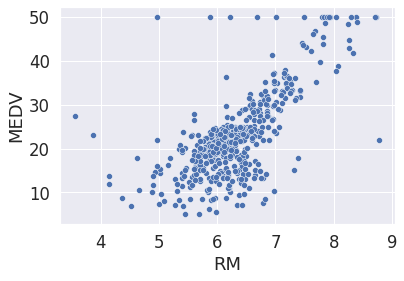

In [86]:
sns.scatterplot(data = df, x = df['RM'], y = df['MEDV'])


Eliminem els outlier de MEDV que tenen un valor de 50

In [87]:
df = df[df.MEDV < 50 ]

In [88]:
df

,NOX,RM,AGE,DIS,LSTAT,MEDV
0,0.538,6.575,65.2,4.0900,4.98,24.0
1,0.469,6.421,78.9,4.9671,9.14,21.6
2,0.469,7.185,61.1,4.9671,4.03,34.7
3,0.458,6.998,45.8,6.0622,2.94,33.4
4,0.458,7.147,54.2,6.0622,5.33,36.2
...,...,...,...,...,...,...
501,0.573,6.593,69.1,2.4786,9.67,22.4
502,0.573,6.120,76.7,2.2875,9.08,20.6
503,0.573,6.976,91.0,2.1675,5.64,23.9
504,0.573,6.794,89.3,2.3889,6.48,22.0


Les característiques de la propietat les guardarem en 'features'

La variable objeciu 'MEDV', és la variable que volem predir i la guardem en 'prices'

In [89]:
prices = df['MEDV']
features = df.drop('MEDV', axis = 1)

In [90]:
features

,NOX,RM,AGE,DIS,LSTAT
0,0.538,6.575,65.2,4.0900,4.98
1,0.469,6.421,78.9,4.9671,9.14
2,0.469,7.185,61.1,4.9671,4.03
3,0.458,6.998,45.8,6.0622,2.94
4,0.458,7.147,54.2,6.0622,5.33
...,...,...,...,...,...
501,0.573,6.593,69.1,2.4786,9.67
502,0.573,6.120,76.7,2.2875,9.08
503,0.573,6.976,91.0,2.1675,5.64
504,0.573,6.794,89.3,2.3889,6.48


In [91]:
from sklearn.model_selection import train_test_split

#Agafem un 20% de les dades per el test i 80% per el train:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

In [92]:
X_train.describe()

,NOX,RM,AGE,DIS,LSTAT
count,392.000000,392.000000,392.00000,392.000000,392.000000
mean,0.553719,6.267681,68.76199,3.828063,12.764260
std,0.115379,0.672845,28.31193,2.121027,7.091269
min,0.389000,3.561000,2.90000,1.137000,1.980000
25%,0.448750,5.887250,45.67500,2.121275,7.187500
50%,0.535000,6.194000,78.80000,3.215700,11.395000
75%,0.624000,6.626000,94.02500,5.245150,16.780000
max,0.871000,8.780000,100.00000,12.126500,37.970000


In [93]:
X_test.describe()

,NOX,RM,AGE,DIS,LSTAT
count,98.000000,98.000000,98.000000,98.000000,98.000000
mean,0.556661,6.156633,66.346939,3.860341,13.563061
std,0.122367,0.561916,27.626478,2.075569,7.050583
min,0.385000,4.138000,6.200000,1.178100,2.980000
25%,0.449000,5.869500,42.950000,2.010175,7.707500
50%,0.538000,6.157500,71.450000,3.665450,12.505000
75%,0.614000,6.452000,93.675000,5.162450,18.002500
max,0.871000,7.686000,100.000000,10.710300,36.980000


# Exercici 2
**Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).**



### Estandarització

Estandaritzar unes dades numèriques significa que estàn escalades de manera que la mitjana és 0 i la desviació estàndard és de 1 unitat.

\begin{equation}
x = (x_{i} - \bar{x} \tag{1}) / s
\end{equation}

In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
standardized_X = scaler.transform(X_train)
standardized_X_test = scaler.transform(X_test)

In [95]:
#El tranformem en df ja que StandardScaler retorna un array per defecte
standardized_X = pd.DataFrame(standardized_X, columns = X_train.columns, index = X_train.index)
standardized_X

,NOX,RM,AGE,DIS,LSTAT
336,-0.336009,-0.593288,-0.794389,0.662335,-0.418550
140,0.609911,-0.139409,0.878420,-1.046189,1.609064
449,1.382269,0.222205,1.044639,-0.775645,0.924250
432,0.262785,0.234110,0.213540,-0.768375,-0.103677
504,0.167325,0.783229,0.726346,-0.679389,-0.887329
...,...,...,...,...,...
106,-0.292618,-0.642396,0.818297,-0.763371,0.832471
280,-0.961705,2.310047,-0.150729,0.409115,-1.271390
359,1.876924,-0.231673,0.443418,-0.622646,-0.013309
451,1.382269,0.576379,1.041103,-0.695298,0.701156


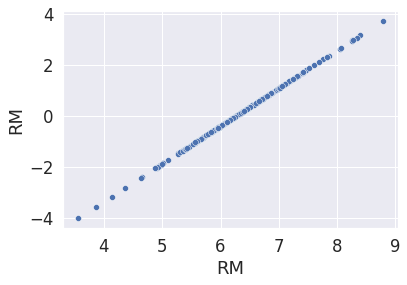

In [96]:
sns.scatterplot(x = X_train.RM, y = standardized_X.RM)

Veiem que obtenim pràcticament el mateix resultat si apliquem diretament la fòrmula.

In [97]:
train_scaled = (X_train-X_train.mean()) / X_train.std()
train_scaled

,NOX,RM,AGE,DIS,LSTAT
336,-0.335580,-0.592531,-0.793375,0.661489,-0.418015
140,0.609133,-0.139231,0.877298,-1.044854,1.607010
449,1.380504,0.221922,1.043306,-0.774655,0.923070
432,0.262449,0.233812,0.213267,-0.767394,-0.103544
504,0.167111,0.782229,0.725419,-0.678522,-0.886197
...,...,...,...,...,...
106,-0.292245,-0.641576,0.817253,-0.762396,0.831408
280,-0.960478,2.307098,-0.150537,0.408593,-1.269767
359,1.874529,-0.231378,0.442853,-0.621851,-0.013292
451,1.380504,0.575644,1.039774,-0.694411,0.700261


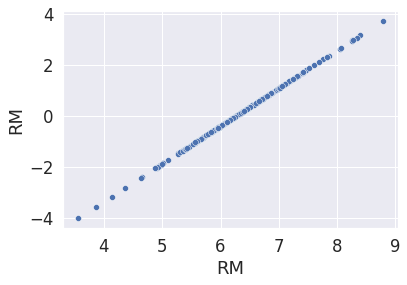

In [98]:
sns.scatterplot(x = X_train.RM, y = train_scaled.RM)

### Normalització
Normalizar les dades significa que les dades estan reescalades de forma que els seus valors estan compresos entre 0 i 1.

\begin{equation}
x = x - min(x) / max(x) - min(x)
\end{equation}

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
normalized_X = scaler.transform(X_train)
normalized_X_test = scaler.transform(X_test)

In [100]:
normalized_X = pd.DataFrame(normalized_X, index = X_train.index, columns = X_train.columns)
normalized_X

,NOX,RM,AGE,DIS,LSTAT
336,0.261411,0.442230,0.446962,0.372547,0.217283
140,0.487552,0.500671,0.934089,0.043214,0.616282
449,0.672199,0.547231,0.982492,0.095364,0.481523
432,0.404564,0.548764,0.740474,0.096765,0.279244
504,0.381743,0.619467,0.889804,0.113918,0.125035
...,...,...,...,...,...
106,0.271784,0.435907,0.916581,0.097730,0.463462
280,0.111826,0.816057,0.634398,0.323736,0.049458
359,0.790456,0.488791,0.807415,0.124856,0.297027
451,0.672199,0.592834,0.981462,0.110851,0.437622


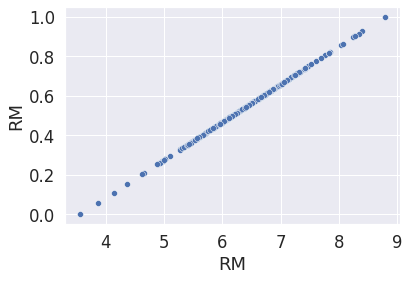

In [101]:
sns.scatterplot(x = X_train.RM, y = normalized_X.RM)

Veiem que obtenim exactament el mateix resultat si obtenim la fòrmula.

In [102]:
train_normalized = (X_train-X_train.min()) / (X_train.max() - X_train.min())
train_normalized

,NOX,RM,AGE,DIS,LSTAT
336,0.261411,0.442230,0.446962,0.372547,0.217283
140,0.487552,0.500671,0.934089,0.043214,0.616282
449,0.672199,0.547231,0.982492,0.095364,0.481523
432,0.404564,0.548764,0.740474,0.096765,0.279244
504,0.381743,0.619467,0.889804,0.113918,0.125035
...,...,...,...,...,...
106,0.271784,0.435907,0.916581,0.097730,0.463462
280,0.111826,0.816057,0.634398,0.323736,0.049458
359,0.790456,0.488791,0.807415,0.124856,0.297027
451,0.672199,0.592834,0.981462,0.110851,0.437622


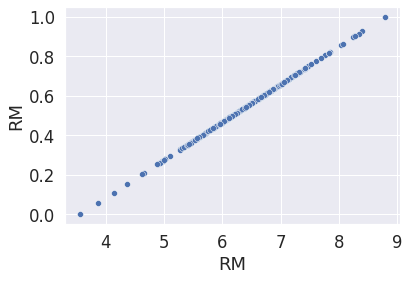

In [103]:
sns.scatterplot(x = X_train.RM, y = train_normalized.RM)

Després d'haver compat les dues transformacións diferents hem vist que tenen exactament la mateixa correlació. En funció de quin sigui el nostre objectiu en l'anàlisis utilitzarem una o l'altre.

# Exercici 3
**Resumeix les noves columnes generades de manera estadística i gràfica**



Volem fer un test d'hipotesis amb les dues tranformacions anteriors i el df sese tranformar i veure la probabilitat de que estiguin correlacionades.

* H0: Les variables normalitzades i les no normalitzades no estàn correlacionades.
* H1: Les variables normalitzades i les no normalitzades estàn correlacionades.

In [104]:
from scipy.stats import pearsonr
stat, p = pearsonr(X_train.RM, normalized_X.RM)
print('stat=%.3f, p-value= %.3f' % (stat, p))
if p > 0.05:
	print('Probablement independent')
else:
	print('Probablement dependent')

stat=1.000, p-value= 0.000
Probablement dependent


Com que p-value < 0.05 rebutjem l'hipòtesis nulla i diem que es probable que estiguin correlacionades. 



Volem fer un test d'hipotesis amb les dues tranformacions anteriors i el df sese tranformar i veure la probabilitat de que estiguin correlacionades.

H0: Les variables estandaritzades i les no estandaritzades no estàn correlacionades.

H1: Les variables estandaritzades i les no estandaritzades estàn correlacionades.

In [105]:
from scipy.stats import pearsonr
stat, p = pearsonr(X_train.RM, standardized_X.RM)
print('stat=%.3f, p-value= %.3f' % (stat, p))
if p > 0.05:
	print('Probablement independent')
else:
	print('Probablement dependent')

stat=1.000, p-value= 0.000
Probablement dependent


Com que p-value < 0.05 rebutjem l'hipòtesis nulla i diem que es probable que estiguin correlacionades. 


Amb les dades estandaritzades mirem la distribució de les diferents varibles i observem que on hi has més dependència és en la 'NOX' i 'DIS', cosa que te sentit ja que com més allunnyat està casa del centre de treball, menys contaminació tindrà.

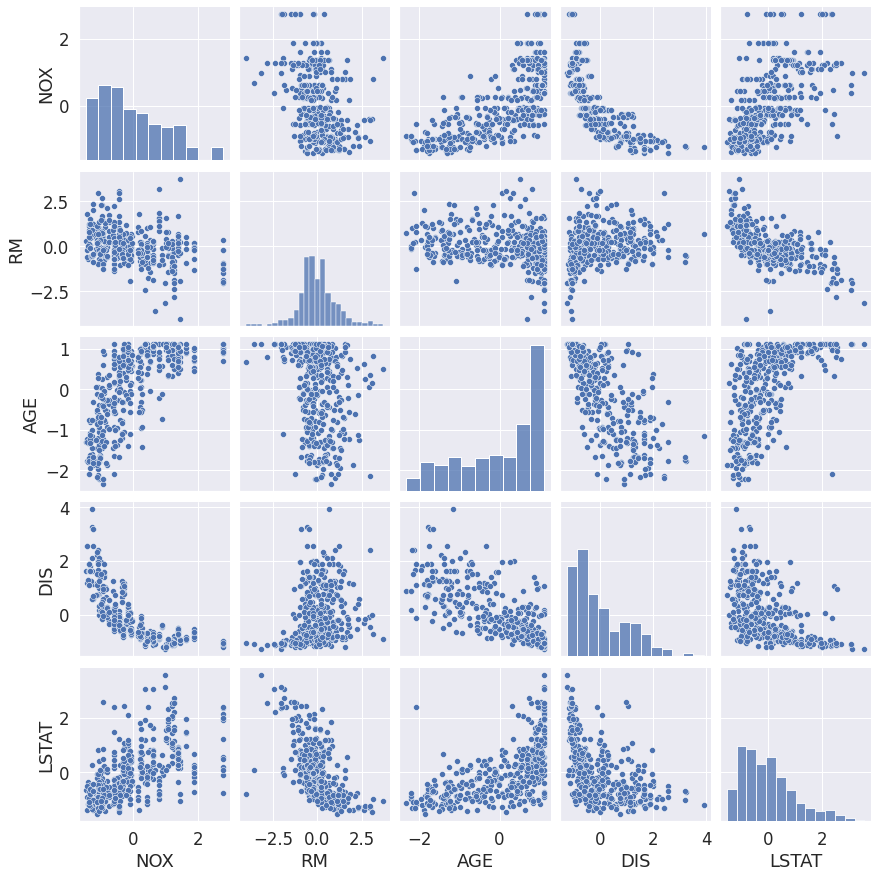

In [106]:
sns. pairplot(data = standardized_X)